# Telecom Case Study 

With 21 predictor variables we need to predict whether a particular customer will switch to another telecom provider or not, this is referred to as churning or not churning respectively.

In [1]:
import numpy as np
import pandas as pd

In [2]:
churn_data=pd.read_csv("churn_data.csv")
cust_data=pd.read_csv("customer_data.csv")
internet_data=pd.read_csv("internet_data.csv")

In [11]:
df_1=pd.merge(churn_data, cust_data, how="inner",on="customerID")


In [12]:
telecom=pd.merge(df_1,internet_data,how="inner",on="customerID")

In [13]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [15]:
telecom.shape

(7043, 21)

In [16]:
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [17]:
telecom['PhoneService']=telecom['PhoneService'].map({'Yes':1,'No':0})
telecom['PaperlessBilling']=telecom['PaperlessBilling'].map({'Yes':1,'No':0})
telecom['Churn']=telecom['Churn'].map({'Yes':1,'No':0})
telecom['Partner']=telecom['Partner'].map({'Yes':1,'No':0})
telecom['Dependents']=telecom['Dependents'].map({'Yes':1,'No':0})

# Creating all categorical variables to dummy valiables

In [21]:
cont=pd.get_dummies(telecom['Contract'],prefix='Contract',drop_first=True)
telecom=pd.concat([telecom,cont],axis=1)

pm=pd.get_dummies(telecom['PaymentMethod'],prefix='PaymentMethod',drop_first=True)
telecom=pd.concat([telecom,pm],axis=1)

pgn=pd.get_dummies(telecom['gender'],prefix='gender',drop_first=True)
telecom=pd.concat([telecom,pgn],axis=1)

m1=pd.get_dummies(telecom['MultipleLines'],prefix='MultipleLines',drop_first=True)
telecom=pd.concat([telecom,m1],axis=1)

iner=pd.get_dummies(telecom['InternetService'],prefix='InternetService',drop_first=True)
telecom=pd.concat([telecom,iner],axis=1)

os=pd.get_dummies(telecom['OnlineSecurity'],prefix='OnlineSecurity')
telecom=pd.concat([telecom,os],axis=1)

os=pd.get_dummies(telecom['OnlineBackup'],prefix='OnlineBackup')
telecom=pd.concat([telecom,os],axis=1)

os=pd.get_dummies(telecom['DeviceProtection'],prefix='DeviceProtection')
telecom=pd.concat([telecom,os],axis=1)

os=pd.get_dummies(telecom['TechSupport'],prefix='TechSupport')
telecom=pd.concat([telecom,os],axis=1)

os=pd.get_dummies(telecom['TechSupport'],prefix='TechSupport')
ts=os.drop(['TechSupport_No internet service'],1)
telecom=pd.concat([telecom,ts],axis=1)

os=pd.get_dummies(telecom['StreamingTV'],prefix='StreamingTV')
ts=os.drop(['StreamingTV_No internet service'],1)
telecom=pd.concat([telecom,ts],axis=1)

os=pd.get_dummies(telecom['StreamingMovies'],prefix='StreamingMovies')
ts=os.drop(['StreamingMovies_No internet service'],1)
telecom=pd.concat([telecom,ts],axis=1)

# Dropping the repeated variables

In [22]:
# We have created dummies for the below variables, so we can drop them
telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)

In [23]:
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,0,1,0,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,0,0,0,...,1,1,0,0,1,0,1,0,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,0,1,0,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,0,1,0,0,1,0,1,0,1,0


In [24]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 87 columns):
customerID                               7043 non-null object
tenure                                   7043 non-null int64
PhoneService                             7043 non-null int64
PaperlessBilling                         7043 non-null int64
MonthlyCharges                           7043 non-null float64
TotalCharges                             7043 non-null object
Churn                                    7043 non-null int64
SeniorCitizen                            7043 non-null int64
Partner                                  7043 non-null int64
Dependents                               7043 non-null int64
Contract_One year                        7043 non-null uint8
Contract_Two year                        7043 non-null uint8
PaymentMethod_Credit card (automatic)    7043 non-null uint8
PaymentMethod_Electronic check           7043 non-null uint8
PaymentMethod_Mailed check         

We can see that the feature TotalCharges is in object type we have to change it..

In [27]:
#The varaible was imported as a string we need to convert it to float
telecom['TotalCharges'] =telecom['TotalCharges'].convert_objects(convert_numeric=True)

C:\Users\Sanket\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [28]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 87 columns):
customerID                               7043 non-null object
tenure                                   7043 non-null int64
PhoneService                             7043 non-null int64
PaperlessBilling                         7043 non-null int64
MonthlyCharges                           7043 non-null float64
TotalCharges                             7032 non-null float64
Churn                                    7043 non-null int64
SeniorCitizen                            7043 non-null int64
Partner                                  7043 non-null int64
Dependents                               7043 non-null int64
Contract_One year                        7043 non-null uint8
Contract_Two year                        7043 non-null uint8
PaymentMethod_Credit card (automatic)    7043 non-null uint8
PaymentMethod_Electronic check           7043 non-null uint8
PaymentMethod_Mailed check        

# Checking for outliers

In [29]:
# Checking for outliers in the continuous variables
num_telecom = telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

# Checking outliers at 25%,50%,75%,90%,95% and 99%
num_telecom.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.850000,0.000000,3794.737500
90%,69.000000,102.600000,1.000000,5976.640000
95%,72.000000,107.400000,1.000000,6923.590000
99%,72.000000,114.729000,1.000000,8039.883000


Here we can observe thatthere is no major hike in value so no outliers are present.

# Checking the missing value and filling them 

In [31]:
telecom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
MultipleLines_No phone service            0
MultipleLines_Yes               

In [34]:
#checking the percentage of missing values
round(100*(telecom.isnull().sum()/len(telecom.index)),2)

customerID                               0.00
tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
gender_Male                              0.00
MultipleLines_No phone service    

We can observe that there is not much significance of NAN rows with respect to total columns so we can drop these rows...

In [35]:
telecom=telecom[~np.isnan(telecom['TotalCharges'])]

In [36]:
round(100*(telecom.isnull().sum()/len(telecom.index)),2)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
MultipleLines_No phone service           0.0
MultipleLi

In [37]:
telecom

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,0,1,0,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.50,0,0,0,0,...,1,1,0,0,1,0,1,0,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,0,1,0,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,0,1,0,0,1,0,1,0,1,0
5,9305-CDSKC,8,1,1,99.65,820.50,1,0,0,0,...,1,1,0,0,1,0,0,1,0,1
6,1452-KIOVK,22,1,1,89.10,1949.40,0,0,0,1,...,0,1,0,0,1,0,0,1,1,0
7,6713-OKOMC,10,0,0,29.75,301.90,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0
8,7892-POOKP,28,1,1,104.80,3046.05,1,0,1,0,...,1,0,0,1,0,1,0,1,0,1
9,6388-TABGU,62,1,0,56.15,3487.95,0,0,0,1,...,0,1,0,0,1,0,1,0,1,0


We can observe many continuous features so we need to standardize them...

# Feature Standardization

In [38]:
# Normalising continuous features
df = telecom[['tenure','MonthlyCharges','TotalCharges']]

normalized_df=(df-df.mean())/df.std()

telecom = telecom.drop(['tenure','MonthlyCharges','TotalCharges'], 1)

telecom = pd.concat([telecom,normalized_df],axis=1)

telecom

,customerID,PhoneService,PaperlessBilling,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),...,TechSupport_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,1,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0,-1.280157,-1.161611,-0.994123
1,5575-GNVDE,1,0,0,0,0,0,1,0,0,...,0,1,0,1,0,1,0,0.064298,-0.260859,-0.173727
2,3668-QPYBK,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,1,0,-1.239416,-0.363897,-0.959581
3,7795-CFOCW,0,0,0,0,0,0,1,0,0,...,1,0,1,1,0,1,0,0.512450,-0.747797,-0.195234
4,9237-HQITU,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,1,0,-1.239416,0.196164,-0.940391
5,9305-CDSKC,1,1,1,0,0,0,0,0,0,...,0,1,0,0,1,0,1,-0.994970,1.158407,-0.645323
6,1452-KIOVK,1,1,0,0,0,1,0,0,1,...,0,1,0,0,1,1,0,-0.424595,0.807745,-0.147302
7,6713-OKOMC,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,-0.913487,-1.164935,-0.874107
8,7892-POOKP,1,1,1,0,1,0,0,0,0,...,1,0,1,0,1,0,1,-0.180148,1.329583,0.336492
9,6388-TABGU,1,0,0,0,0,1,1,0,0,...,0,1,0,1,0,1,0,1.205048,-0.287450,0.531438


# Checking the Churn Rate

In [39]:
churn = (sum(telecom['Churn'])/len(telecom['Churn'].index))*100
churn

26.578498293515356

This shows that our 26.6 % of our customers churn the operator that is a very large number since this is not a perfect number we need to improve our model to get the correct %.

# Model Building

Spliting training and testing data

In [40]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = telecom.drop(['Churn','customerID'],axis=1)

# Putting response variable to y
y = telecom['Churn']

In [41]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

# Logistic regression model

In [43]:
import statsmodels.api as sm
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Mon, 29 Jul 2019   Deviance:                       4009.4
Time:                        19:02:00   Pearson chi2:                 6.07e+03
No. Iterations:                   100   Covariance Type:             nonrobust
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.5033      0.115     -4.362      0.000      -0.729      -0.277
PhoneService                             -0.1398      0.117     -1.199      0.230      -0.368       0.089
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Contract_One year                        -0.1644      0.032     -5.106      0.000      -0.228      -0.101
Contract_Two year                        -0.3114      0.053     -5.874      0.000      -0.415      -0.207
PaymentMethod_Credit card (automatic)    -0.0644      0.034     -1.883      0.060      -0.131       0.003
PaymentMethod_Electronic check            0.0404      0.028      1.434      0.152      -0.015       0.096
PaymentMethod_Mailed check               -0.0634      0.034     -1.845      0.065      -0.131       0.004
Contract_One year                        -0.1644      0.032     -5.106      0.000      -0.228      -0.101
Contract_Two year                        -0.3114      0.053     -5.874      0.000      -0.415      -0.207
PaymentMethod_Credit card (automatic)    -0.0644      0.034     -1.883      0.060      -0.131       0.003
PaymentMethod_Electronic check            0.0404      0.028      1.434      0.152      -0.015       0.096
PaymentMethod_Mailed check               -0.0634      0.034     -1.845      0.065      -0.131       0.004
gender_Male                              -0.0115      0.026     -0.442      0.658      -0.063       0.040
MultipleLines_No phone service           -0.3635      0.225     -1.615      0.106      -0.805       0.078
MultipleLines_Yes                         0.1874      0.071      2.629      0.009       0.048       0.327
InternetService_Fiber optic               0.8375      0.322      2.599      0.009       0.206       1.469
InternetService_No                       -0.3413      0.115     -2.960      0.003      -0.567      -0.115
OnlineSecurity_No                        -0.0769      0.036     -2.142      0.032      -0.147      -0.007
OnlineSecurity_No internet service       -0.3413      0.115     -2.960      0.003      -0.567      -0.115
OnlineSecurity_Yes                       -0.0851      0.038     -2.244      0.025      -0.159      -0.011
OnlineBackup_No                          -0.1100      0.035     -3.116      0.002      -0.179      -0.041
OnlineBackup_No internet service         -0.3413      0.115     -2.960      0.003      -0.567      -0.115
OnlineBackup_Yes                         -0.0520      0.037     -1.403      0.161      -

# Correlation matrix 


By this matrix we can observe that which two columns are having almost similar properties,so that we can remove any one from them because there is no significance of keeping the same columns.

In [44]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

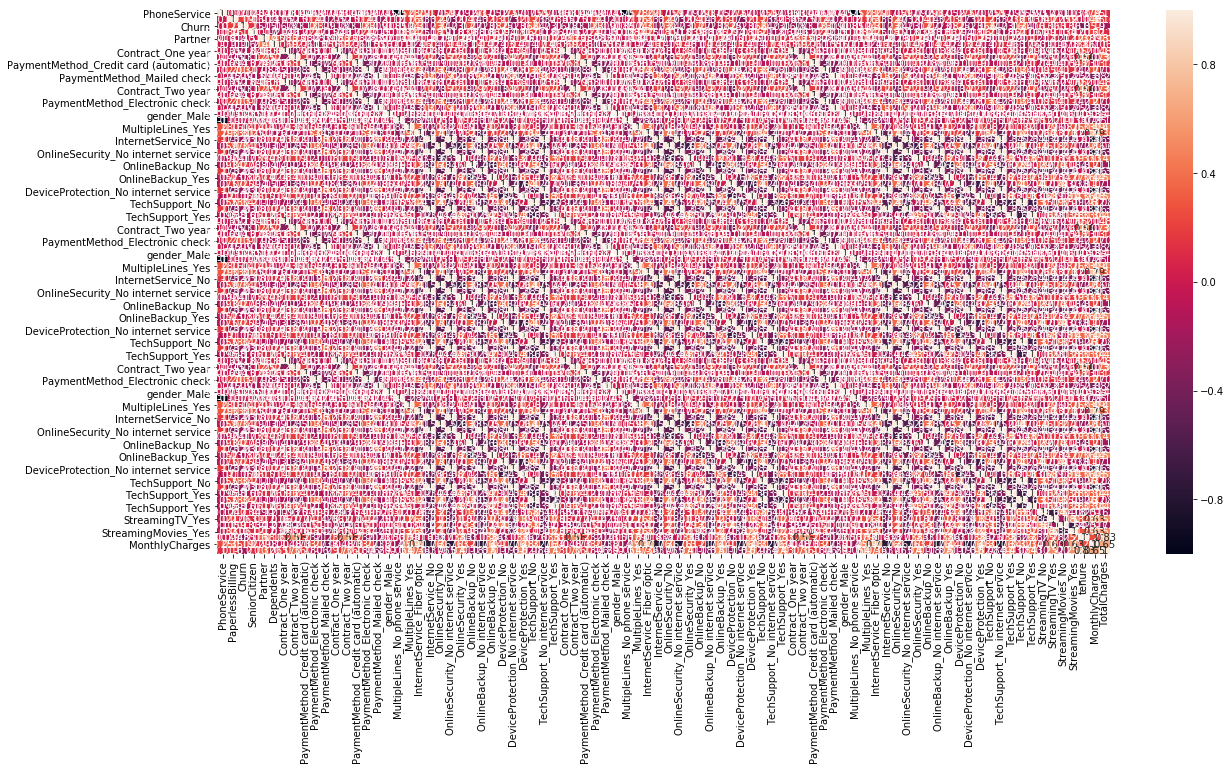

In [47]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(telecom.corr(),annot = True)

In [48]:
telecom.corr()

,PhoneService,PaperlessBilling,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,...,TechSupport_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,tenure,MonthlyCharges,TotalCharges
PhoneService,1.000000,0.016696,0.011691,0.008392,0.018397,-0.001078,-0.003142,0.004442,-0.006916,0.002747,...,-0.095138,-0.055102,-0.095138,-0.123159,-0.021383,-0.111273,-0.033477,0.007877,0.248033,0.113008
PaperlessBilling,0.016696,1.000000,0.191454,0.156258,-0.013957,-0.110131,-0.052278,-0.146281,-0.013726,0.208427,...,0.037536,0.229875,0.037536,0.046715,0.224241,0.058987,0.211583,0.004823,0.351930,0.157830
Churn,0.011691,0.191454,1.000000,0.150541,-0.149982,-0.163128,-0.178225,-0.301552,-0.134687,0.301455,...,-0.164716,0.336877,-0.164716,0.128435,0.063254,0.130920,0.060860,-0.354049,0.192858,-0.199484
SeniorCitizen,0.008392,0.156258,0.150541,1.000000,0.016957,-0.210550,-0.046491,-0.116205,-0.024359,0.171322,...,-0.060577,0.205254,-0.060577,0.048664,0.105445,0.034196,0.119842,0.015683,0.219874,0.102411
Partner,0.018397,-0.013957,-0.149982,0.016957,1.000000,0.452269,0.083067,0.247334,0.082327,-0.083207,...,0.120206,-0.108875,0.120206,-0.123394,0.124483,-0.117488,0.118108,0.381912,0.097825,0.319072
Dependents,-0.001078,-0.110131,-0.163128,-0.210550,0.452269,1.000000,0.069222,0.201699,0.061134,-0.149274,...,0.063053,-0.171164,0.063053,-0.099912,-0.016499,-0.078245,-0.038375,0.163386,-0.112343,0.064653
Contract_One year,-0.003142,-0.052278,-0.178225,-0.046491,0.083067,0.069222,1.000000,-0.288843,0.067590,-0.109546,...,0.096258,-0.118709,0.096258,-0.093495,0.061930,-0.096613,0.064780,0.202338,0.004810,0.170569
Contract_Two year,0.004442,-0.146281,-0.301552,-0.116205,0.247334,0.201699,-0.288843,1.000000,0.174410,-0.281147,...,0.240924,-0.397788,0.240924,-0.254456,0.072124,-0.258495,0.075603,0.563801,-0.073256,0.358036
PaymentMethod_Credit card (automatic),-0.006916,-0.013726,-0.134687,-0.024359,0.082327,0.061134,0.067590,0.174410,1.000000,-0.373978,...,0.117024,-0.107761,0.117024,-0.041309,0.040010,-0.049817,0.048398,0.232800,0.030055,0.182663
PaymentMethod_Electronic check,0.002747,0.208427,0.301455,0.171322,-0.083207,-0.149274,-0.109546,-0.281147,-0.373978,1.000000,...,-0.114807,0.338529,-0.114807,0.095426,0.144747,0.102617,0.137420,-0.210197,0.271117,-0.060436


# Dropping the highly correlated value

In [49]:
X_test2 = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'],1)
X_train2 = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'],1)

# Checking correlation after dropping the column

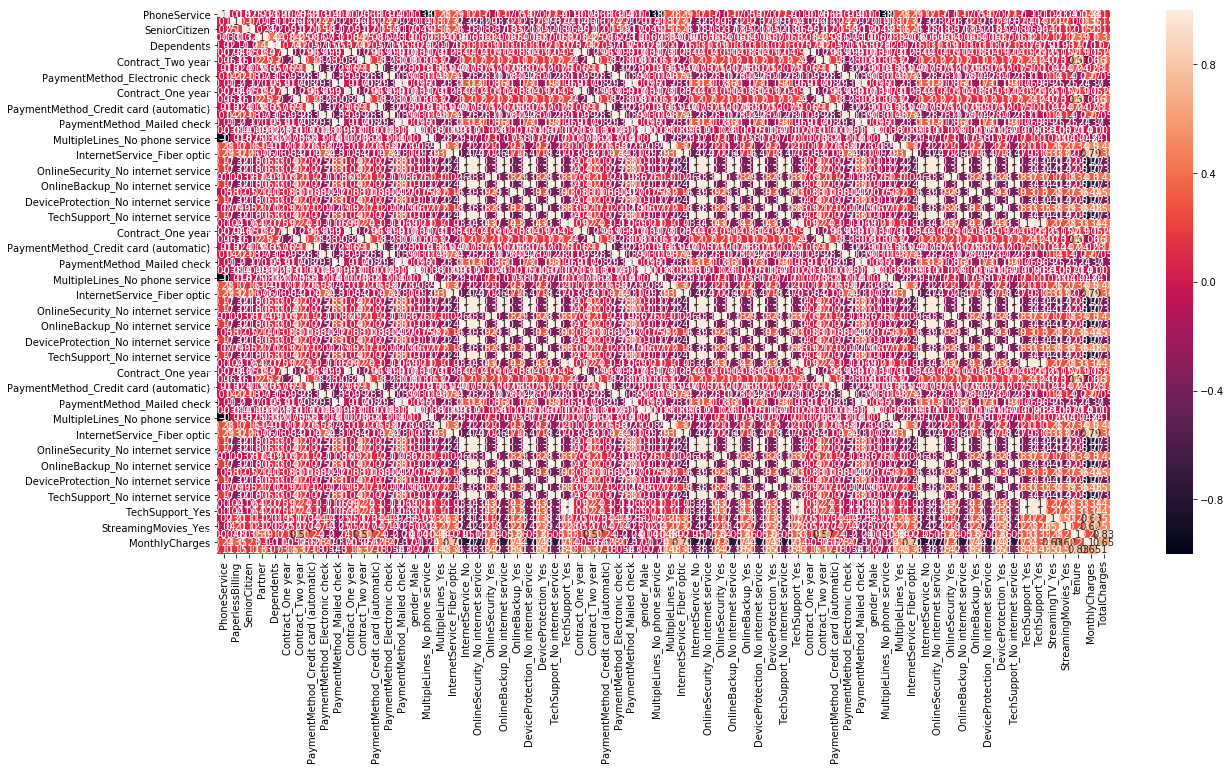

In [50]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train2.corr(),annot = True)

# Re-Running the model

In [51]:
logm2 = sm.GLM(y_train,(sm.add_constant(X_train2)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Mon, 29 Jul 2019   Deviance:                       4009.4
Time:                        19:21:09   Pearson chi2:                 6.07e+03
No. Iterations:                   100   Covariance Type:             nonrobust
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.8404      0.553     -3.329      0.001      -2.924      -0.757
PhoneService                             -1.1426      0.231     -4.936      0.000      -1.596      -0.689
PaperlessBilling                          0.3254      0.090      3.617      0.000       0.149       0.502
SeniorCitizen                             0.3984      0.102      3.923      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.400      0.689      -0.146       0.221
Dependents                               -0.1430      0.107     -1.334      0.182      -0.353       0.067
Contract_One year                        -0.1644      0.032     -5.115      0.000      -0.227      -0.101
Contract_Two year                        -0.3114      0.053     -5.890      0.000      -0.415      -0.208
PaymentMethod_Credit card (automatic)    -0.0644      0.034     -1.886      0.059      -0.131       0.003
PaymentMethod_Electronic check            0.0404      0.028      1.435      0.151      -0.015       0.096
PaymentMethod_Mailed check               -0.0634      0.034     -1.846      0.065      -0.131       0.004
Contract_One year                        -0.1644      0.032     -5.115      0.000      -0.227      -0.101
Contract_Two year                        -0.3114      0.053     -5.890      0.000      -0.415      -0.208
PaymentMethod_Credit card (automatic)    -0.0644      0.034     -1.886      0.059      -0.131       0.003
PaymentMethod_Electronic check            0.0404      0.028      1.435      0.151      -0.015       0.096
PaymentMethod_Mailed check               -0.0634      0.034     -1.846      0.065      -0.131       0.004
gender_Male                              -0.0115      0.026     -0.442      0.658      -0.063       0.040
MultipleLines_No phone service           -0.6978      0.332     -2.101      0.036      -1.349      -0.047
MultipleLines_Yes                         0.1874      0.071      2.630      0.009       0.048       0.327
InternetService_Fiber optic               0.8374      0.322      2.601      0.009       0.206       1.469
InternetService_No                       -0.1853      0.065     -2.833      0.005      -0.313      -0.057
OnlineSecurity_No internet service       -0.1853      0.065     -2.833      0.005      -0.313      -0.057
OnlineSecurity_Yes                       -0.0082      0.072     -0.113      0.910      -0.149       0.133
OnlineBackup_No internet service         -0.1853      0.065     -2.833      0.005      -0.313      -0.057
OnlineBackup_Yes                          0.0580      0.071      0.823      0.411      -0.080       0.196
DeviceProtection_No internet service     -0.1853      0.065     -2.833      0.005      -0.313      -0.057
DeviceProtection_Yes                      0.1076      0.072      1.502      0.133      -

# Feature selection using RFE

In [52]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 13)             # running RFE with 13 variables as output
rfe = rfe.fit(X,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

[False False False False False False False False False False  True  True
 False False False False False False False False False False False False
 False False False False False False False False False  True False False
 False False False False  True False False False False False False False
 False False False False False False False  True False False False False
 False False  True  True False  True False False  True False False False
 False False False False False False False False  True False  True  True
  True]
[36 12 23 73 34 26 10 59 32 68  1  1 53  9 56 65 69 31  2  6 58  5 35 50
  3 38 16 29 30 48 14 25 33  1 62 49 70 72 66  7  1 18 63 19 24 39 21 43
 28 15 17 51 27 37 11  1 67 41 64 71 61 46  1  1 60  1 42 44  1 40 20  8
 22 54 13 45 57 47  4 55  1 52  1  1  1]


In [55]:
# Variables selected by RFE 
col = ['PhoneService', 'PaperlessBilling', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check','InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes','TechSupport_Yes','StreamingMovies_No','tenure','TotalCharges']

# Model building using LogisticRegression

In [56]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression()
logsk.fit(X_train[col], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [57]:
# comparing the model with statsmodel
import statsmodels.api as sm

logm3 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4909
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2027.2
Date:                Mon, 29 Jul 2019   Deviance:                       4054.3
Time:                        19:38:11   Pearson chi2:                 6.27e+03
No. Iterations:                     7   Covariance Type:             nonrobust
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.9793      0.168     -5.828      0.000      -1.309      -0.650
PhoneService                      -0.4816      0.159     -3.037      0.002      -0.792      -0.171
PaperlessBilling                   0.3701      0.089      4.152      0.000       0.195       0.545
Contract_One year                 -0.1809      0.032     -5.706      0.000      -0.243      -0.119
Contract_One year                 -0.1809      0.032     -5.706      0.000      -0.243      -0.119
Contract_One year                 -0.1809      0.032     -5.706      0.000      -0.243      -0.119
Contract_One year                 -0.1809      0.032     -5.706      0.000      -0.243      -0.119
Contract_Two year                 -0.3346      0.053     -6.359      0.000      -0.438      -0.231
Contract_Two year                 -0.3346      0.053     -6.359      0.000      -0.438      -0.231
Contract_Two year                 -0.3346      0.053     -6.359      0.000      -0.438      -0.231
Contract_Two year                 -0.3346      0.053     -6.359      0.000      -0.438      -0.231
PaymentMethod_Electronic check     0.0930      0.021      4.517      0.000       0.053       0.133
PaymentMethod_Electronic check     0.0930      0.021      4.517      0.000       0.053       0.133
PaymentMethod_Electronic check     0.0930      0.021      4.517      0.000       0.053       0.133
PaymentMethod_Electronic check     0.0930      0.021      4.517      0.000       0.053       0.133
InternetService_Fiber optic        0.2738      0.039      7.098      0.000       0.198       0.349
InternetService_Fiber optic        0.2738      0.039      7.098      0.000       0.198       0.349
InternetService_Fiber optic        0.2738      0.039      7.098      0.000       0.198       0.349
InternetService_No                -0.4019      0.061     -6.616      0.000      -0.521      -0.283
InternetService_No                -0.4019      0.061     -6.616      0.000      -0.521      -0.283
InternetService_No                -0.4019      0.061     -6.616      0.000      -0.521      -0.283
OnlineSecurity_Yes                -0.1388      0.034     -4.094      0.000      -0.205      -0.072
OnlineSecurity_Yes                -0.1388      0.034     -4.094      0.000      -0.205      -0.072
OnlineSecurity_Yes                -0.1388      0.034     -4.094      0.000      -0.205      -0.072
TechSupport_Yes                   -0.1068      0.025     -4.230      0.000      -0.156      -0.057
TechSupport_Yes                   -0.1068      0.025     -4.230      0.000      -0.156      -0.057
TechSupport_Yes                   -0.1068      0.025     -4.230      0.000      -0.156      -0.057
TechSupport_Yes                   -0.1068      0.025     -4.230      0.000      -0.156      -0.057
StreamingMovies_No                -0.2053      0.094     -2.193      0.028      -0.389      -

---->We can observe that p-value have become much better...

# VIF calculation

In [58]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [65]:
telecom.columns
['PhoneService', 'PaperlessBilling', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check','MultipleLines_No','InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes','TechSupport_Yes','StreamingMovies_No','tenure','TotalCharges']

['PhoneService',
 'PaperlessBilling',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Electronic check',
 'MultipleLines_No',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_Yes',
 'TechSupport_Yes',
 'StreamingMovies_No',
 'tenure',
 'TotalCharges']

In [70]:
col = ['PaperlessBilling', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check','InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes','TechSupport_Yes','StreamingMovies_No','tenure','TotalCharges']

In [71]:
logm5 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
logm5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4910
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2031.7
Date:                Mon, 29 Jul 2019   Deviance:                       4063.5
Time:                        19:51:35   Pearson chi2:                 5.94e+03
No. Iterations:                     7   Covariance Type:             nonrobust
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.2869      0.136     -9.475      0.000      -1.553      -1.021
PaperlessBilling                   0.3701      0.089      4.160      0.000       0.196       0.544
Contract_One year                 -0.1819      0.032     -5.740      0.000      -0.244      -0.120
Contract_One year                 -0.1819      0.032     -5.740      0.000      -0.244      -0.120
Contract_One year                 -0.1819      0.032     -5.740      0.000      -0.244      -0.120
Contract_One year                 -0.1819      0.032     -5.740      0.000      -0.244      -0.120
Contract_Two year                 -0.3323      0.053     -6.326      0.000      -0.435      -0.229
Contract_Two year                 -0.3323      0.053     -6.326      0.000      -0.435      -0.229
Contract_Two year                 -0.3323      0.053     -6.326      0.000      -0.435      -0.229
Contract_Two year                 -0.3323      0.053     -6.326      0.000      -0.435      -0.229
PaymentMethod_Electronic check     0.0953      0.021      4.636      0.000       0.055       0.136
PaymentMethod_Electronic check     0.0953      0.021      4.636      0.000       0.055       0.136
PaymentMethod_Electronic check     0.0953      0.021      4.636      0.000       0.055       0.136
PaymentMethod_Electronic check     0.0953      0.021      4.636      0.000       0.055       0.136
InternetService_Fiber optic        0.2346      0.036      6.521      0.000       0.164       0.305
InternetService_Fiber optic        0.2346      0.036      6.521      0.000       0.164       0.305
InternetService_Fiber optic        0.2346      0.036      6.521      0.000       0.164       0.305
InternetService_No                -0.4606      0.057     -8.026      0.000      -0.573      -0.348
InternetService_No                -0.4606      0.057     -8.026      0.000      -0.573      -0.348
InternetService_No                -0.4606      0.057     -8.026      0.000      -0.573      -0.348
OnlineSecurity_Yes                -0.1397      0.034     -4.123      0.000      -0.206      -0.073
OnlineSecurity_Yes                -0.1397      0.034     -4.123      0.000      -0.206      -0.073
OnlineSecurity_Yes                -0.1397      0.034     -4.123      0.000      -0.206      -0.073
TechSupport_Yes                   -0.1091      0.025     -4.326      0.000      -0.158      -0.060
TechSupport_Yes                   -0.1091      0.025     -4.326      0.000      -0.158      -0.060
TechSupport_Yes                   -0.1091      0.025     -4.326      0.000      -0.158      -0.060
TechSupport_Yes                   -0.1091      0.025     -4.326      0.000      -0.158      -0.060
StreamingMovies_No                -0.2403      0.093     -2.586      0.010      -0.422      -0.058
tenure                            -1.3860      0.177     -7.830      0.000      -1.733      -

# Creating Regression model 

In [75]:
col = ['PaperlessBilling', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check','InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes','TechSupport_Yes','StreamingMovies_No','tenure','TotalCharges']

In [76]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression()
logsk.fit(X_train[col], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [77]:
# Predicted probabilities
y_pred = logsk.predict_proba(X_test[col])

# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

# Let's see the head
y_pred_1.head()

,1
0,0.547104
1,0.371904
2,0.005446
3,0.658204
4,0.007812


In [79]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','Churn','Churn_Prob'], axis=1)

# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Churn,Churn_Prob
0,942,0,0.547104
1,3730,1,0.371904
2,1761,0,0.005446
3,2283,1,0.658204
4,1872,0,0.007812


In [80]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_pred_final.head()

,CustID,Churn,Churn_Prob,predicted
0,942,0,0.547104,1
1,3730,1,0.371904,0
2,1761,0,0.005446,0
3,2283,1,0.658204,1
4,1872,0,0.007812,0


# Model Evaluation

In [81]:
#creating confusion matrix
from sklearn import metrics
conf=metrics.confusion_matrix( y_pred_final.Churn, y_pred_final.predicted )
conf

array([[1358,  170],
       [ 262,  320]], dtype=int64)

In [82]:
# Predicted     not_churn    churn
# Actual
# not_churn        1358      170
# churn            262       320  

In [83]:
#Let's check the overall accuracy.
metrics.accuracy_score( y_pred_final.Churn, y_pred_final.predicted)

0.795260663507109

---->We can see that our model accuracy is almost 80% which is quite good we can further improve our model based on varios techniques which we have used in our previous models.

# X-----------X----- LogisticRegression Ends ------X------------X